<a href="https://colab.research.google.com/github/khushgrover/smart-match/blob/main/OpenCv_GrabCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
!wget -O top.jpg 'https://assets.myntassets.com/h_1440,q_90,w_1080/v1/assets/images/11843434/2020/8/24/4e6dbfeb-086a-4cc9-abec-8130b44609d41598248534011-MANGO-Women-Pink-Solid-High-Neck-Styled-Back-Top-11715982485-1.jpg'
!wget -O pant.jpg 'https://assets.myntassets.com/h_1440,q_90,w_1080/v1/assets/images/productimage/2020/1/18/e79ecd08-d474-4b93-a611-0cdf05cabc601579304372394-1.jpg'
!wget -O dress.jpg 'https://assets.myntassets.com/h_1440,q_90,w_1080/v1/assets/images/productimage/2020/6/13/ba735e0c-72da-4c7c-a4ac-50de2626244a1592000854878-1.jpg'

--2020-10-23 06:18:40--  https://assets.myntassets.com/h_1440,q_90,w_1080/v1/assets/images/11843434/2020/8/24/4e6dbfeb-086a-4cc9-abec-8130b44609d41598248534011-MANGO-Women-Pink-Solid-High-Neck-Styled-Back-Top-11715982485-1.jpg
Resolving assets.myntassets.com (assets.myntassets.com)... 184.26.81.90
Connecting to assets.myntassets.com (assets.myntassets.com)|184.26.81.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140828 (138K) [image/jpeg]
Saving to: ‘top.jpg’

top.jpg             100%[===================>] 137.53K  --.-KB/s    in 0.02s   

2020-10-23 06:18:40 (5.51 MB/s) - ‘top.jpg’ saved [140828/140828]

--2020-10-23 06:18:40--  https://assets.myntassets.com/h_1440,q_90,w_1080/v1/assets/images/productimage/2020/1/18/e79ecd08-d474-4b93-a611-0cdf05cabc601579304372394-1.jpg
Resolving assets.myntassets.com (assets.myntassets.com)... 184.26.81.90
Connecting to assets.myntassets.com (assets.myntassets.com)|184.26.81.90|:443... connected.
HTTP request sent, awai

In [ ]:
images = ['top.jpg', 'pant.jpg', 'dress.jpg']

imageTop = cv2.imread('top.jpg')
imageTop = cv2.cvtColor(imageTop, cv2.COLOR_BGR2RGB)
imagePant = cv2.imread('pant.jpg')
imagePant = cv2.cvtColor(imagePant, cv2.COLOR_BGR2RGB)
imageDress = cv2.imread('dress.jpg')
imageDress = cv2.cvtColor(imageDress, cv2.COLOR_BGR2RGB)

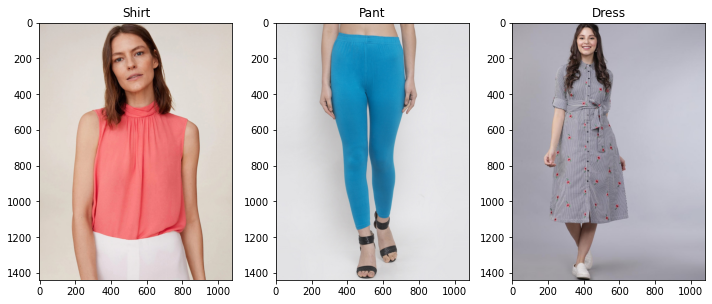

In [ ]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Shirt') 
ax1.imshow(imageTop)
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Pant') 
ax2.imshow(imagePant)
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Dress')
ax3.imshow(imageDress)
plt.tight_layout()

In [ ]:
rectangleTop = (300, 400, 800, 800)

backgroundModelTop = np.zeros((1, 65), np.float64) 
foregroundModelTop = np.zeros((1, 65), np.float64) 

mask1 = np.zeros(imageTop.shape[:2], np.uint8)

cv2.grabCut(imageTop, mask1, rectangleTop,   
            backgroundModelTop, foregroundModelTop, 
            10, cv2.GC_INIT_WITH_RECT)
topMask = np.where((mask1 == 2)|(mask1 == 0), 0, 1).astype('uint8')
top = imageTop * topMask[:, :, np.newaxis] 

In [ ]:
rectanglePant = (300, 100, 600, 1100)

backgroundModelPant = np.zeros((1, 65), np.float64) 
foregroundModelPant = np.zeros((1, 65), np.float64) 

mask2 = np.ones(imagePant.shape[:2], np.uint8)

cv2.grabCut(imagePant, mask2, rectanglePant,   
            backgroundModelPant, foregroundModelPant, 
            10, cv2.GC_INIT_WITH_RECT)

pantMask = np.where((mask2 == 2)|(mask2 == 0), 0, 1).astype('uint8')
pant = imagePant * pantMask[:, :, np.newaxis]

In [ ]:
rectangleDress = (200, 200, 550, 1000)

backgroundModelDress = np.zeros((1, 65), np.float64) 
foregroundModelDress = np.zeros((1, 65), np.float64) 

mask3 = np.ones(imageDress.shape[:2], np.uint8)

cv2.grabCut(imageDress, mask3, rectangleDress,   
            backgroundModelDress, foregroundModelDress, 
            10, cv2.GC_INIT_WITH_RECT) 

dressMask = np.where((mask3 == 2)|(mask3 == 0), 0, 1).astype('uint8')
dress = imageDress * dressMask[:, :, np.newaxis]

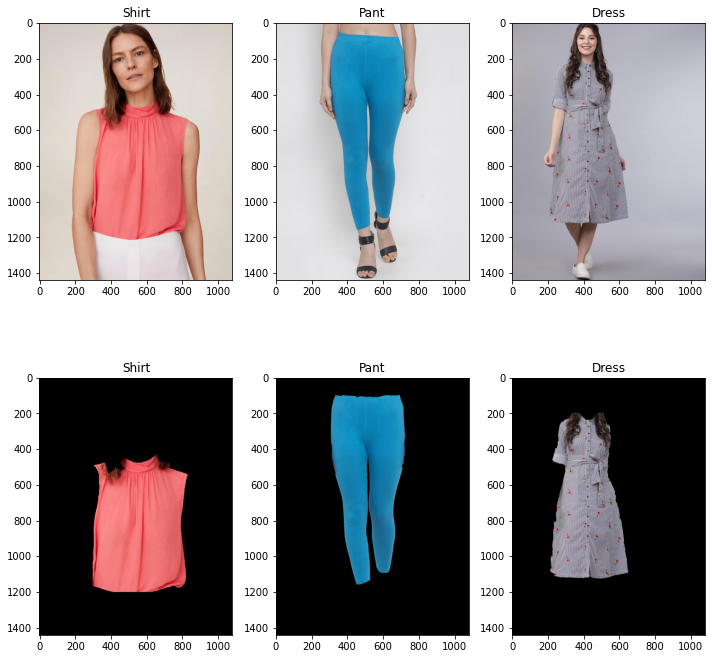

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax1.set_title('Shirt') 
ax1.imshow(imageTop)
ax2 = fig.add_subplot(2,3,2)
ax2.set_title('Pant') 
ax2.imshow(imagePant)
ax3 = fig.add_subplot(2,3,3)
ax3.set_title('Dress') 
ax3.imshow(imageDress)
ax1 = fig.add_subplot(2,3,4)
ax1.set_title('Shirt') 
ax1.imshow(top)
ax2 = fig.add_subplot(2,3,5)
ax2.set_title('Pant') 
ax2.imshow(pant)
ax3 = fig.add_subplot(2,3,6)
ax3.set_title('Dress') 
ax3.imshow(dress)
plt.tight_layout()